In [1]:
import time
start = time.time()
import re 
import numpy as np
import pandas as pd
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime as dt
#-----------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#----------------------------------------------------
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Markdown, display
import warnings 
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('moviereviews.tsv', sep = '\t')
dataset.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [3]:
len(dataset)

2000

# Take a look at a typical review. This one is labeled "negative"

In [4]:
#Original
dataset['review'][0]

'how do films like mouse hunt get into theatres ? \r\nisn\'t there a law or something ? \r\nthis diabolical load of claptrap from steven speilberg\'s dreamworks studio is hollywood family fare at its deadly worst . \r\nmouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . \r\nwriter adam rifkin and director gore verbinski are the names chiefly responsible for this swill . \r\nthe plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . \r\ndeciding to check out the long-abandoned house , they soon learn that it\'s worth a fortune and set about selling it in auction to the highest bidder . \r\nbut battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . \r\

In [5]:
#A bit of a sophictated display
display(Markdown('> '+dataset['review'][0]))

> how do films like mouse hunt get into theatres ? 
isn't there a law or something ? 
this diabolical load of claptrap from steven speilberg's dreamworks studio is hollywood family fare at its deadly worst . 
mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . 
writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill . 
the plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . 
deciding to check out the long-abandoned house , they soon learn that it's worth a fortune and set about selling it in auction to the highest bidder . 
but battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . 
the story alternates between unfunny scenes of the brothers bickering over what to do with their inheritance and endless action sequences as the two take on their increasingly determined furry foe . 
whatever promise the film starts with soon deteriorates into boring dialogue , terrible overacting , and increasingly uninspired slapstick that becomes all sound and fury , signifying nothing . 
the script becomes so unspeakably bad that the best line poor lee evens can utter after another run in with the rodent is : " i hate that mouse " . 
oh cringe ! 
this is home alone all over again , and ten times worse . 
one touching scene early on is worth mentioning . 
we follow the mouse through a maze of walls and pipes until he arrives at his makeshift abode somewhere in a wall . 
he jumps into a tiny bed , pulls up a makeshift sheet and snuggles up to sleep , seemingly happy and just wanting to be left alone . 
it's a magical little moment in an otherwise soulless film . 
a message to speilberg : if you want dreamworks to be associated with some kind of artistic credibility , then either give all concerned in mouse hunt a swift kick up the arse or hire yourself some decent writers and directors . 
this kind of rubbish will just not do at all . 


In [6]:
dataset['label'].value_counts()

pos    1000
neg    1000
Name: label, dtype: int64

In [7]:
#Droping the Null value coloum
dataset.isnull().sum()

label      0
review    35
dtype: int64

In [8]:
dataset.dropna(inplace=True)

In [9]:
print(dataset['label'].value_counts())
print(len(dataset))

neg    983
pos    982
Name: label, dtype: int64
1965


In [10]:
# Removing whitespace if any

blank = [] # start with an empty list

for i, lb, rv in dataset.itertuples():    # iterating over the DataFrame
    if type(rv) == str:               # avoid NaN values
        if rv.isspace():              # test 'review' for whitespace
            blank.append(i)           # add matching index numbers to the list

print(len(blank))
print('Index location of Blanks: ',blank)

27
Index location of Blanks:  [57, 71, 147, 151, 283, 307, 313, 323, 343, 351, 427, 501, 633, 675, 815, 851, 977, 1079, 1299, 1455, 1493, 1525, 1531, 1763, 1851, 1905, 1993]


In [11]:
#Droping the blank index locations
dataset.drop(blank, inplace=True)
print(dataset['label'].value_counts())
print(len(dataset))

pos    969
neg    969
Name: label, dtype: int64
1938


In [12]:
#Independent and dependent variables
X = dataset['review']
Y = dataset['label']

In [13]:
# Mapping "pos" to 1 and "neg" to 0
dataset['label'] = dataset['label'].map({"pos" : 1, "neg" : 0})
print(dataset['label'].head())

0    0
1    0
2    1
3    1
4    0
Name: label, dtype: int64


In [14]:
def Clean_data(data): 
    review = re.sub(r"\s+[a-zA-Z]\s+", " ", dataset['review'][i])
    review = re.sub(r"^[a-zA-Z]", " ", dataset['review'][i])
    review = re.sub(r"[a-zA-Z]$", " ", dataset['review'][i])
    review = re.sub(r"\W", " ", dataset['review'][i])
    review = re.sub(r"\d", " ", dataset['review'][i])
    review = re.sub(r"\s+", " ", dataset['review'][i])
    review = re.sub(r"^s+", " ", dataset['review'][i])
    review = re.sub(r"\s+$", " ", dataset['review'][i])
    review = review.lower()
    return review
          
# Updated the city columns 
dataset['review'] = dataset['review'].apply(Clean_data) 
  
# Print the updated dataframe 
print(dataset['review'][0]) 

a couple of months ago , when i first downloaded the face/off trailer from the net , my initial reaction was a fourteen carrot gold 'yawn' . 
followed swiftly by a press of my computers delete key , not wanting to waste six or seven megabytes of precious space on this piss-poor trailer . 
then i started reading the first wave of reviews from the u . s . . . . . unique . . . excellent . . . . must-see . 
well , i thought still skeptical , i suppose i might as well go see it when it gets here . 
'here' , of course , was still three months away . 
i'll admit , when i trotted off to see this film , the only john woo movie i had seen before was the fairly enjoyable but highly forgetable broken arrow . 
i'd heard good things about his previous work with movies like hard boiled , but his films were definitely not on my must-see list . 
that , let me tell you , has changed completely . 
i knew this fact only five minutes into the film , after the brilliantly shot and acted opening sequence whe

In [15]:
#Tf - IDF Modelling
tfidf = TfidfVectorizer(max_features = 2000, 
                        min_df = 3, 
                        max_df = 0.6,
                        stop_words = stopwords.words('english'))
X = tfidf.fit_transform(X).toarray()

In [16]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                     Y, 
                                                     test_size = 0.2, 
                                                     random_state = 101)

In [17]:
print("Size of X_train: {}".format(X_train.shape))
print("Size of X_test: {}".format(X_test.shape))
print("Size of Y_train: {}".format(Y_train.shape))
print("Size of Y_test: {}".format(Y_test.shape))

Size of X_train: (1550, 2000)
Size of X_test: (388, 2000)
Size of Y_train: (1550,)
Size of Y_test: (388,)


# Logistic Regression Classifier

In [18]:
st=dt.now()
logits = LogisticRegression(solver = 'liblinear')
logits.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

Time taken to complete random search:  0:00:00.297017


In [19]:
pred_logits = logits.predict(X_test)

In [20]:
#Comparing the results
cm = confusion_matrix(pred_logits, Y_test)
print(cm, '\n')
logits_acc = accuracy_score(pred_logits, Y_test)
print("The accuracy is: {}% \n ".format(logits_acc*100))
cr = classification_report(pred_logits, Y_test)
print(cr)

[[165  38]
 [ 26 159]] 

The accuracy is: 83.50515463917526% 
 
             precision    recall  f1-score   support

        neg       0.86      0.81      0.84       203
        pos       0.81      0.86      0.83       185

avg / total       0.84      0.84      0.84       388



# K Nearest Neighbours Classifier

In [21]:
st=dt.now()
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

Time taken to complete random search:  0:00:01.087040


In [22]:
knn_pred = knn.predict(X_test)

In [23]:
#Comparing the results
cm = confusion_matrix(knn_pred, Y_test)
print(cm, '\n')
kacc = accuracy_score(knn_pred, Y_test)
print("The accuracy is: {}% \n ".format(kacc*100))
cr = classification_report(knn_pred, Y_test)
print(cr)

[[125  49]
 [ 66 148]] 

The accuracy is: 70.36082474226805% 
 
             precision    recall  f1-score   support

        neg       0.65      0.72      0.68       174
        pos       0.75      0.69      0.72       214

avg / total       0.71      0.70      0.70       388



# Liner Support Vector Classifier

In [24]:
st=dt.now()
l_svc = SVC(kernel = 'linear')
l_svc.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

Time taken to complete random search:  0:00:12.652375


In [25]:
l_pred = l_svc.predict(X_test)

In [26]:
#Comparing the results
cm = confusion_matrix(l_pred, Y_test)
print(cm, '\n')
lsvcacc = accuracy_score(l_pred, Y_test)
print("The accuracy is: {}% \n ".format(lsvcacc*100))
cr = classification_report(l_pred, Y_test)
print(cr)

[[159  42]
 [ 32 155]] 

The accuracy is: 80.9278350515464% 
 
             precision    recall  f1-score   support

        neg       0.83      0.79      0.81       201
        pos       0.79      0.83      0.81       187

avg / total       0.81      0.81      0.81       388



# Kernel SVM

In [27]:
st=dt.now()
gk_svc = SVC(kernel = 'rbf')
gk_svc.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

Time taken to complete random search:  0:00:15.814349


In [28]:
gk_pred = gk_svc.predict(X_test)

In [29]:
#Comparing the results
cm = confusion_matrix(gk_pred, Y_test)
print(cm, '\n')
ksvcaccacc = accuracy_score(gk_pred, Y_test)
print("The accuracy is: {}% \n ".format(ksvcaccacc*100))
cr = classification_report(gk_pred, Y_test)
print(cr)

[[191 197]
 [  0   0]] 

The accuracy is: 49.22680412371135% 
 
             precision    recall  f1-score   support

        neg       1.00      0.49      0.66       388
        pos       0.00      0.00      0.00         0

avg / total       1.00      0.49      0.66       388



# Random Forest Classifier

In [30]:
st=dt.now()
randomforest = RandomForestClassifier(n_estimators = 100, 
                                      random_state = 0)
randomforest.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

Time taken to complete random search:  0:00:10.568556


In [31]:
random_pred = randomforest.predict(X_test)

In [32]:
#Comparing the results
cm = confusion_matrix(random_pred, Y_test)
print(cm, '\n')
rmacc = accuracy_score(random_pred, Y_test)
print("The accuracy is: {}% \n ".format(rmacc*100))
cr = classification_report(random_pred, Y_test)
print(cr)

[[161  58]
 [ 30 139]] 

The accuracy is: 77.31958762886599% 
 
             precision    recall  f1-score   support

        neg       0.84      0.74      0.79       219
        pos       0.71      0.82      0.76       169

avg / total       0.78      0.77      0.77       388



# Decision Tree Classifier

In [33]:
st=dt.now()
decison = DecisionTreeClassifier(criterion = 'entropy', 
                                 random_state = 0)
decison.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

Time taken to complete random search:  0:00:05.240290


In [34]:
decison_pred = decison.predict(X_test)

In [35]:
#Comparing the results
cm = confusion_matrix(decison_pred, Y_test)
print(cm, '\n')
dtacc = accuracy_score(decison_pred, Y_test)
print("The accuracy is: {}% \n ".format(dtacc*100))
cr = classification_report(decison_pred, Y_test)
print(cr)

[[118  75]
 [ 73 122]] 

The accuracy is: 61.855670103092784% 
 
             precision    recall  f1-score   support

        neg       0.62      0.61      0.61       193
        pos       0.62      0.63      0.62       195

avg / total       0.62      0.62      0.62       388



# BernoulliNB Classifier

In [36]:
st=dt.now()
bernb = BernoulliNB()
bernb.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

Time taken to complete random search:  0:00:00.429025


In [37]:
bernb_predict = bernb.predict(X_test)

In [38]:
#Comparing the results
cm = confusion_matrix(bernb_predict, Y_test)
print(cm, '\n')
bncacc = accuracy_score(bernb_predict, Y_test)
print("The accuracy is: {}% \n ".format(bncacc*100))
cr = classification_report(bernb_predict, Y_test)
print(cr)

[[164  42]
 [ 27 155]] 

The accuracy is: 82.21649484536083% 
 
             precision    recall  f1-score   support

        neg       0.86      0.80      0.83       206
        pos       0.79      0.85      0.82       182

avg / total       0.82      0.82      0.82       388



# MultinomialNB Classifier

In [39]:
st=dt.now()
mulnb = MultinomialNB()
mulnb.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

Time taken to complete random search:  0:00:00.133008


In [40]:
mulnb_predict = mulnb.predict(X_test)

In [41]:
#Comparing the results
cm = confusion_matrix(mulnb_predict, Y_test)
print(cm, '\n')
mulacc = accuracy_score(mulnb_predict, Y_test)
print("The accuracy is: {}% \n ".format(mulacc*100))
cr = classification_report(mulnb_predict, Y_test)
print(cr)

[[164  44]
 [ 27 153]] 

The accuracy is: 81.70103092783505% 
 
             precision    recall  f1-score   support

        neg       0.86      0.79      0.82       208
        pos       0.78      0.85      0.81       180

avg / total       0.82      0.82      0.82       388



In [42]:
print('\n                             Accuracy')
print('                            -------------')

print('Logistic Regression        : {:.04} %'.format(logits_acc * 100))
print('KNN Classifier             : {:.04} %'.format(kacc * 100))
print('Linear SVC                 : {:.04} %'.format(lsvcacc * 100))
print('Gaussian Kernel SVC        : {:.04} %'.format(ksvcaccacc * 100))
print('Decision Trees Classifier  : {:.04} %'.format(dtacc * 100))
print('Random Forest Classifier   : {:.04} %'.format(rmacc * 100))
print('BernoulliNB Classifier     : {:.04} %'.format(bncacc * 100))
print('MultinomialNB Classifier   : {:.04} %'.format(mulacc * 100))


                             Accuracy
                            -------------
Logistic Regression        : 83.51 %
KNN Classifier             : 70.36 %
Linear SVC                 : 80.93 %
Gaussian Kernel SVC        : 49.23 %
Decision Trees Classifier  : 61.86 %
Random Forest Classifier   : 77.32 %
BernoulliNB Classifier     : 82.22 %
MultinomialNB Classifier   : 81.7 %


Text(0.5,1,'Accuracy Comparism')

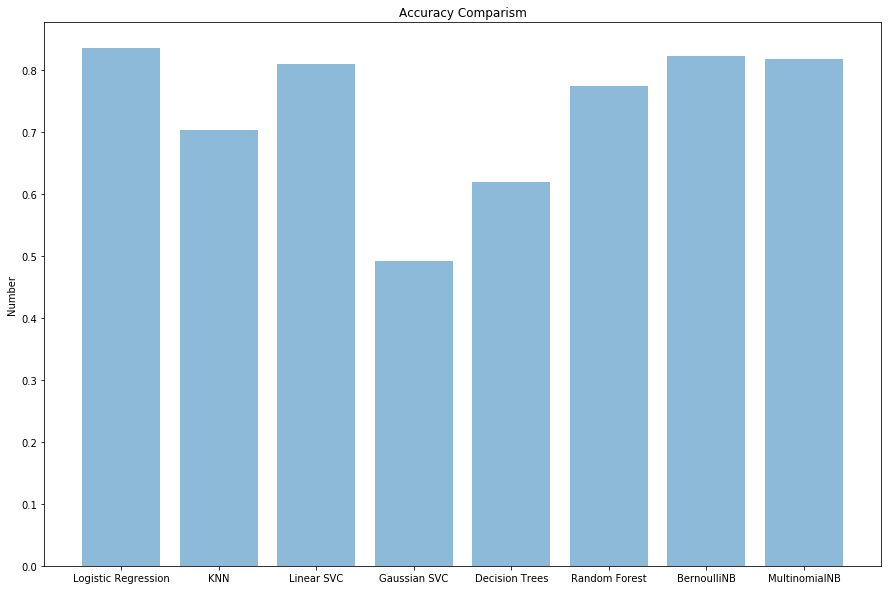

In [43]:
figure = plt.figure(figsize=(15, 10))
# Visualizing the results
objects = ['Logistic Regression',
           'KNN', 
           'Linear SVC', 
           'Gaussian SVC', 
           'Decision Trees', 
           'Random Forest', 
           'BernoulliNB', 
           'MultinomialNB']
y_pos = np.arange(len(objects))
plt.bar(y_pos,[logits_acc,kacc,lsvcacc,ksvcaccacc,dtacc,rmacc,bncacc,mulacc],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Accuracy Comparism')

In [44]:
end = time.time()
print("Total Time Taken: {}".format(end-start))

Total Time Taken: 102.49089121818542


# Saving Our Model and the Classifier

In [47]:
with open('logits.pickle', 'wb') as f:
    pickle.dump(logits, f)
    
# Saving the Tf-Idf model
with open('tfidf.pickle','wb') as f:
    pickle.dump(tfidf,f)